In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import jsm_halopull
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# small number stats

In [76]:
early = jsm_visualize.Tree_Vis(file="../../../StellarHalo/data/four_examples/DF/early_evo.npz", merger_crit=-2, fesc=0.2, scatter=False, verbose=False)
middle = jsm_visualize.Tree_Vis(file="../../../StellarHalo/data/four_examples/DF/middle_evo.npz", merger_crit=-2, fesc=0.2, scatter=False, verbose=False)
late = jsm_visualize.Tree_Vis(file="../../../StellarHalo/data/four_examples/DF/late_evo.npz", merger_crit=-2, fesc=0.2, scatter=False, verbose=False)
latest = jsm_visualize.Tree_Vis(file="../../../StellarHalo/data/four_examples/DF/latest_evo.npz", merger_crit=-2, fesc=0.2, scatter=False, verbose=False)

In [77]:
early_mfrac1 = np.sum(early.acc_mass[early.acc_order == 1])/np.sum(early.acc_mass[1:])

early_mfrac2 = np.sum(early.acc_mass[early.acc_order == 2])/np.sum(early.acc_mass[1:])

early_mfrac3 = np.sum(early.acc_mass[early.acc_order == 3])/np.sum(early.acc_mass[1:])

In [78]:
middle_mfrac1 = np.sum(middle.acc_mass[middle.acc_order == 1])/np.sum(middle.acc_mass[1:])

middle_mfrac2 = np.sum(middle.acc_mass[middle.acc_order == 2])/np.sum(middle.acc_mass[1:])

middle_mfrac3 = np.sum(middle.acc_mass[middle.acc_order == 3])/np.sum(middle.acc_mass[1:])

In [79]:
late_mfrac1 = np.sum(late.acc_mass[late.acc_order == 1])/np.sum(late.acc_mass[1:])

late_mfrac2 = np.sum(late.acc_mass[late.acc_order == 2])/np.sum(late.acc_mass[1:])

late_mfrac3 = np.sum(late.acc_mass[late.acc_order == 3])/np.sum(late.acc_mass[1:])

In [80]:
latest_mfrac1 = np.sum(latest.acc_mass[latest.acc_order == 1])/np.sum(latest.acc_mass[1:])

latest_mfrac2 = np.sum(latest.acc_mass[latest.acc_order == 2])/np.sum(latest.acc_mass[1:])

latest_mfrac3 = np.sum(latest.acc_mass[latest.acc_order == 3])/np.sum(latest.acc_mass[1:])

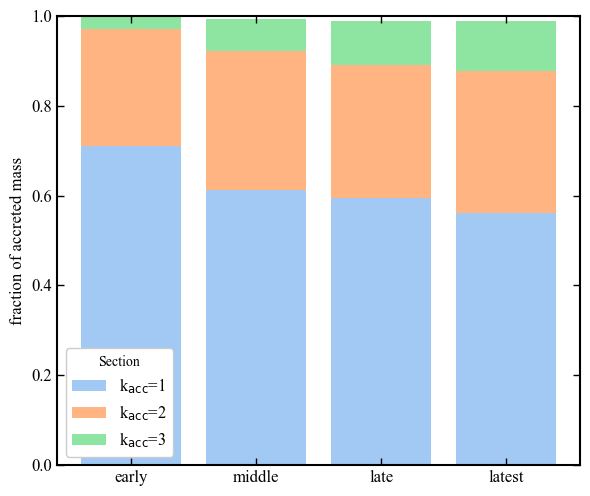

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data: 4 groups (bars), each with 3 stacked sections
data = {
    "group": ["early", "middle", "late", "latest"] * 3,
    "section": [
        "k$_{\\rm acc}$=1"
    ] * 4 + [
        "k$_{\\rm acc}$=2"
    ] * 4 + [
        "k$_{\\rm acc}$=3"
    ] * 4,
    "value": np.array([
        early_mfrac1, middle_mfrac1, late_mfrac1, latest_mfrac1,
        early_mfrac2, middle_mfrac2, late_mfrac2, latest_mfrac2,
        early_mfrac3, middle_mfrac3, late_mfrac3, latest_mfrac3
    ])
}

df = pd.DataFrame(data)

# Pivot and enforce order
pivot_df = df.pivot(index="group", columns="section", values="value")
order = ["early", "middle", "late", "latest"]
pivot_df = pivot_df.loc[order]

# Define colors for each section
colors = sns.color_palette("pastel", n_colors=3)

# Plot stacked bars
fig, ax = plt.subplots(figsize=(6, 5))

bottom = np.zeros(len(pivot_df))
for section, color in zip(pivot_df.columns, colors):
    ax.bar(pivot_df.index, pivot_df[section], bottom=bottom, label=section, color=color)
    bottom += pivot_df[section]

ax.set_ylabel("fraction of accreted mass")
ax.legend(title="Section",framealpha=1)

plt.tight_layout()
plt.ylim(0,1)
plt.show()


In [82]:
early_nfrac1 = np.sum(early.acc_order == 1)/(early.Nhalo-1)

early_nfrac2 = np.sum(early.acc_order == 2)/(early.Nhalo-1)

early_nfrac3 = np.sum(early.acc_order == 3)/(early.Nhalo-1)

In [83]:
middle_nfrac1 = np.sum(middle.acc_order == 1)/(middle.Nhalo-1)

middle_nfrac2 = np.sum(middle.acc_order == 2)/(middle.Nhalo-1)

middle_nfrac3 = np.sum(middle.acc_order == 3)/(middle.Nhalo-1)

In [84]:
late_nfrac1 = np.sum(late.acc_order == 1)/(late.Nhalo-1)

late_nfrac2 = np.sum(late.acc_order == 2)/(late.Nhalo-1)

late_nfrac3 = np.sum(late.acc_order == 3)/(late.Nhalo-1)

In [85]:
latest_nfrac1 = np.sum(latest.acc_order == 1)/(latest.Nhalo-1)

latest_nfrac2 = np.sum(latest.acc_order == 2)/(latest.Nhalo-1)

latest_nfrac3 = np.sum(latest.acc_order == 3)/(latest.Nhalo-1)

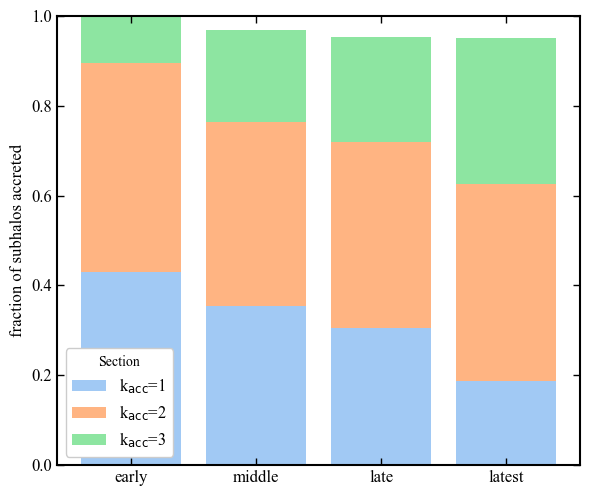

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data: 4 groups (bars), each with 3 stacked sections
data = {
    "group": ["early", "middle", "late", "latest"] * 3,
    "section": [
        "k$_{\\rm acc}$=1"
    ] * 4 + [
        "k$_{\\rm acc}$=2"
    ] * 4 + [
        "k$_{\\rm acc}$=3"
    ] * 4,
    "value": np.array([
        early_nfrac1, middle_nfrac1, late_nfrac1, latest_nfrac1,
        early_nfrac2, middle_nfrac2, late_nfrac2, latest_nfrac2,
        early_nfrac3, middle_nfrac3, late_nfrac3, latest_nfrac3
    ])
}

df = pd.DataFrame(data)

# Pivot and enforce order
pivot_df = df.pivot(index="group", columns="section", values="value")
order = ["early", "middle", "late", "latest"]
pivot_df = pivot_df.loc[order]

# Define colors for each section
colors = sns.color_palette("pastel", n_colors=3)

# Plot stacked bars
fig, ax = plt.subplots(figsize=(6, 5))

bottom = np.zeros(len(pivot_df))
for section, color in zip(pivot_df.columns, colors):
    ax.bar(pivot_df.index, pivot_df[section], bottom=bottom, label=section, color=color)
    bottom += pivot_df[section]

ax.set_ylabel("fraction of subhalos accreted")
ax.legend(title="Section",framealpha=1, loc=3)

plt.tight_layout()
plt.ylim(0,1)
plt.show()


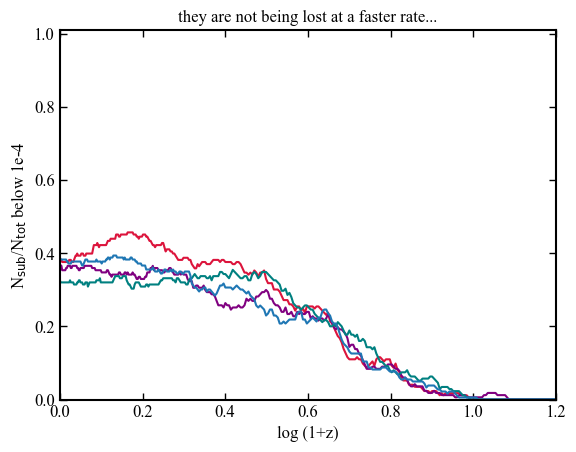

In [87]:
plt.title("they are not being lost at a faster rate...")

plt.plot(np.log10(1+cfg.zsample), (early.Nhalo - np.sum(np.log10(early.fb) <= -4, axis=0))/early.Nhalo, color="crimson")
plt.plot(np.log10(1+cfg.zsample), (middle.Nhalo - np.sum(np.log10(middle.fb) <= -4, axis=0))/middle.Nhalo, color="purple")
plt.plot(np.log10(1+cfg.zsample), (late.Nhalo - np.sum(np.log10(late.fb) <= -4, axis=0))/late.Nhalo, color="teal")
plt.plot(np.log10(1+cfg.zsample), (latest.Nhalo - np.sum(np.log10(latest.fb) <= -4, axis=0))/latest.Nhalo, color="C0")

plt.xlabel("log (1+z)")
plt.ylabel("N$_{\\rm sub}$/N$_{\\rm tot}$ below 1e-4")
plt.ylim(0,1.01)
plt.xlim(0, 1.2)
plt.show()

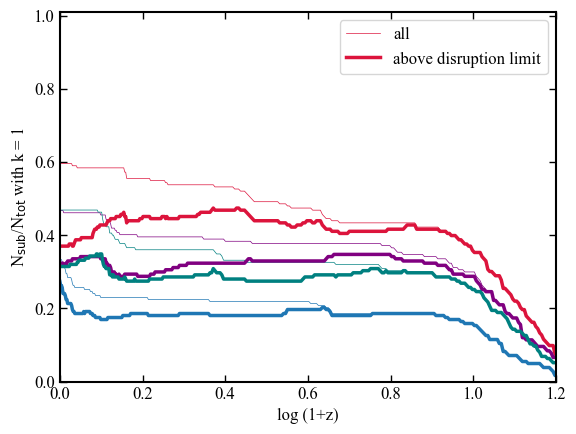

In [88]:
plt.plot(np.log10(1+cfg.zsample), np.sum(early.order == 1, axis=0)/early.Nhalo, color="crimson", ls="-", lw=0.5, label="all")
plt.plot(np.log10(1+cfg.zsample), np.sum(middle.order == 1, axis=0)/middle.Nhalo, color="purple", ls="-", lw=0.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(late.order == 1, axis=0)/late.Nhalo, color="teal", ls="-", lw=0.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(latest.order == 1, axis=0)/latest.Nhalo, color="C0", ls="-", lw=0.5)


plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(early.valid_fbs, early.order == 1), axis=0)/early.Nhalo, color="crimson", ls="-", lw=2.5, label="above disruption limit")
plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(middle.valid_fbs, middle.order == 1), axis=0)/middle.Nhalo, color="purple", ls="-", lw=2.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(late.valid_fbs, late.order == 1), axis=0)/late.Nhalo, color="teal", ls="-", lw=2.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(latest.valid_fbs, latest.order == 1), axis=0)/latest.Nhalo, color="C0", ls="-", lw=2.5)

plt.legend()
plt.xlabel("log (1+z)")
plt.ylabel("N$_{\\rm sub}$/N$_{\\rm tot}$ with k = 1")
plt.ylim(0,1.01)
plt.xlim(0, 1.2)

plt.show()

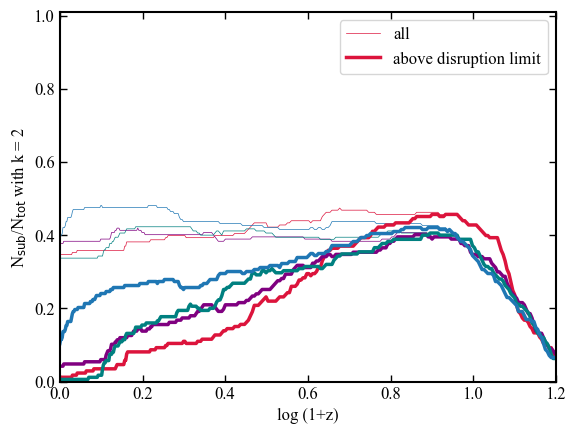

In [89]:
plt.plot(np.log10(1+cfg.zsample), np.sum(early.order == 2, axis=0)/early.Nhalo, color="crimson", ls="-", lw=0.5, label="all")
plt.plot(np.log10(1+cfg.zsample), np.sum(middle.order == 2, axis=0)/middle.Nhalo, color="purple", ls="-", lw=0.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(late.order == 2, axis=0)/late.Nhalo, color="teal", ls="-", lw=0.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(latest.order == 2, axis=0)/latest.Nhalo, color="C0", ls="-", lw=0.5)


plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(early.valid_fbs, early.order == 2), axis=0)/early.Nhalo, color="crimson", ls="-", lw=2.5, label="above disruption limit")
plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(middle.valid_fbs, middle.order == 2), axis=0)/middle.Nhalo, color="purple", ls="-", lw=2.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(late.valid_fbs, late.order == 2), axis=0)/late.Nhalo, color="teal", ls="-", lw=2.5)
plt.plot(np.log10(1+cfg.zsample), np.sum(np.logical_and(latest.valid_fbs, latest.order == 2), axis=0)/latest.Nhalo, color="C0", ls="-", lw=2.5)

plt.legend()
plt.xlabel("log (1+z)")
plt.ylabel("N$_{\\rm sub}$/N$_{\\rm tot}$ with k = 2")
plt.ylim(0,1.01)
plt.xlim(0, 1.2)

plt.show()

# order stuff as a function of z50

In [90]:
N_early_1 = np.sum(early.acc_order[early.surviving_subhalos] == 1)
N_middle_1 = np.sum(middle.acc_order[middle.surviving_subhalos] == 1)
N_late_1 = np.sum(late.acc_order[late.surviving_subhalos] == 1)
N_latest_1 = np.sum(latest.acc_order[latest.surviving_subhalos] == 1)

N_early_2 = np.sum(early.acc_order[early.surviving_subhalos] == 2)
N_middle_2 = np.sum(middle.acc_order[middle.surviving_subhalos] == 2)
N_late_2 = np.sum(late.acc_order[late.surviving_subhalos] == 2)
N_latest_2 = np.sum(latest.acc_order[latest.surviving_subhalos] == 2) 

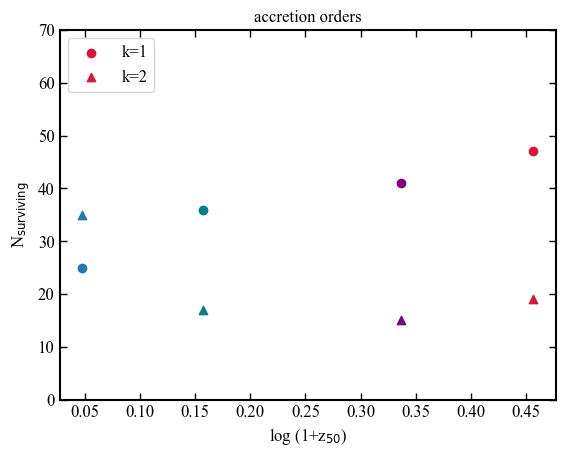

In [91]:
plt.title("accretion orders")

plt.scatter(np.log10(1+early.host_z50), N_early_1, color="crimson", label="k=1")
plt.scatter(np.log10(1+middle.host_z50), N_middle_1, color="purple")
plt.scatter(np.log10(1+late.host_z50), N_late_1, color="teal")
plt.scatter(np.log10(1+latest.host_z50), N_latest_1, color="C0")

plt.scatter(np.log10(1+early.host_z50), N_early_2, color="crimson", marker="^", label="k=2")
plt.scatter(np.log10(1+middle.host_z50), N_middle_2, color="purple", marker="^")
plt.scatter(np.log10(1+late.host_z50), N_late_2, color="teal", marker="^")
plt.scatter(np.log10(1+latest.host_z50), N_latest_2, color="C0", marker="^")
plt.legend(loc=2)
plt.ylim(0, 70)
plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")
plt.show()

In [19]:
N_early_1 = np.sum(early.final_order[early.surviving_subhalos] == 1)
N_middle_1 = np.sum(middle.final_order[middle.surviving_subhalos] == 1)
N_late_1 = np.sum(late.final_order[late.surviving_subhalos] == 1)
N_latest_1 = np.sum(latest.final_order[latest.surviving_subhalos] == 1)

N_early_2 = np.sum(early.final_order[early.surviving_subhalos] == 2)
N_middle_2 = np.sum(middle.final_order[middle.surviving_subhalos] == 2)
N_late_2 = np.sum(late.final_order[late.surviving_subhalos] == 2)
N_latest_2 = np.sum(latest.final_order[latest.surviving_subhalos] == 2)

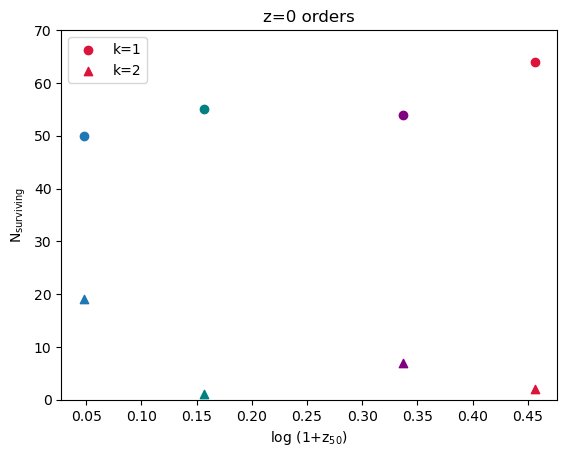

In [20]:
plt.title("z=0 orders")

plt.scatter(np.log10(1+early.host_z50), N_early_1, color="crimson", label="k=1")
plt.scatter(np.log10(1+middle.host_z50), N_middle_1, color="purple")
plt.scatter(np.log10(1+late.host_z50), N_late_1, color="teal")
plt.scatter(np.log10(1+latest.host_z50), N_latest_1, color="C0")

plt.scatter(np.log10(1+early.host_z50), N_early_2, color="crimson", marker="^", label="k=2")
plt.scatter(np.log10(1+middle.host_z50), N_middle_2, color="purple", marker="^")
plt.scatter(np.log10(1+late.host_z50), N_late_2, color="teal", marker="^")
plt.scatter(np.log10(1+latest.host_z50), N_latest_2, color="C0", marker="^")
plt.legend(loc=2)
plt.ylim(0, 70)
plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")
plt.show()

In [21]:
N_early = np.sum(early.final_order[early.surviving_subhalos] == early.acc_order[early.surviving_subhalos])
N_middle = np.sum(middle.final_order[middle.surviving_subhalos] == middle.acc_order[middle.surviving_subhalos])
N_late = np.sum(late.final_order[late.surviving_subhalos] == late.acc_order[late.surviving_subhalos])
N_latest = np.sum(latest.final_order[latest.surviving_subhalos] == latest.acc_order[latest.surviving_subhalos])

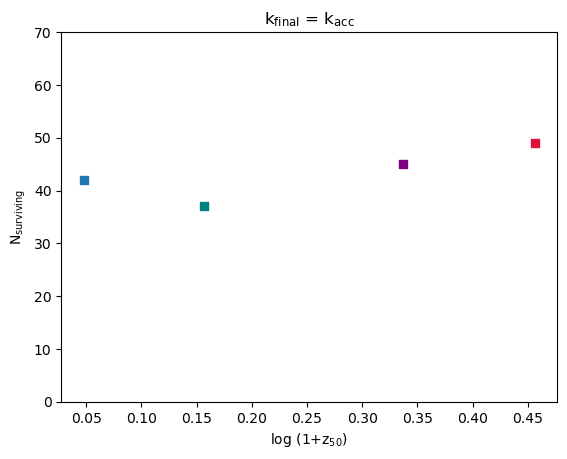

In [22]:
plt.title("k$_{\\rm final}$ = k$_{\\rm acc}$")

plt.scatter(np.log10(1+early.host_z50), N_early, color="crimson", marker="s")
plt.scatter(np.log10(1+middle.host_z50), N_middle, color="purple", marker="s")
plt.scatter(np.log10(1+late.host_z50), N_late, color="teal", marker="s")
plt.scatter(np.log10(1+latest.host_z50), N_latest, color="C0", marker="s")
plt.xlabel("log (1+z$_{50}$)")
plt.ylabel("N$_{\\rm surviving}$")

plt.ylim(0, 70)

plt.show()

# leaf mass resolution cut!

In [23]:
plt.style.use('../../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [24]:
S0 = jsm_ancillary.load_sample("../../data/fiducial/S0HR_sample.h5")

In [25]:
def measure_abundance_correlation(sample, mass_res, mask_orders=None, plot=True):

    final_mass = jsm_ancillary.make_matrix(sample, "sat_mass")
    acc_order = jsm_ancillary.make_matrix(sample, "sat_acc_order")
    final_order = jsm_ancillary.make_matrix(sample, "sat_order")
    z50 = np.array(S0.host_z50)

    if mask_orders=="1":
        order_mask = acc_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="2":
        order_mask = acc_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="3":
        order_mask = final_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="4":
        order_mask = final_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    abundance = np.sum(final_mass > mass_res, axis=1)
    correlation = jsm_stats.correlation(z50,  abundance)

    if plot:
        sns.kdeplot(x=np.log10(1+z50), y=abundance, levels=levelz, color="green", linestyles="--", bw_adjust=1.5)
        plt.title('$\\rho_{S}$ ='+f' {correlation:.2f}')
        plt.xlabel("log (1+z$_{50}$)")
        plt.ylabel("N subhalos")
        plt.xlim(-0.02)
        plt.show()

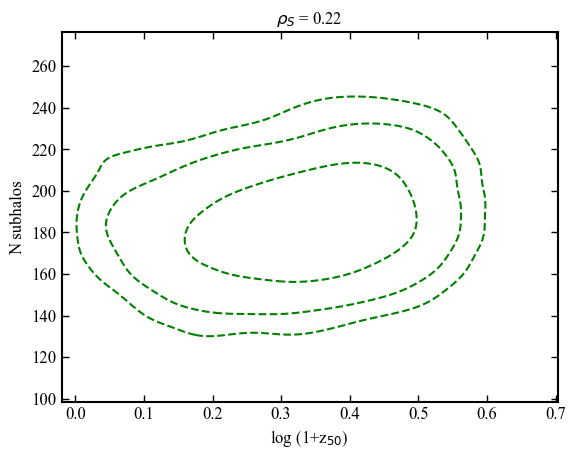

In [26]:
measure_abundance_correlation(S0, 1e8)

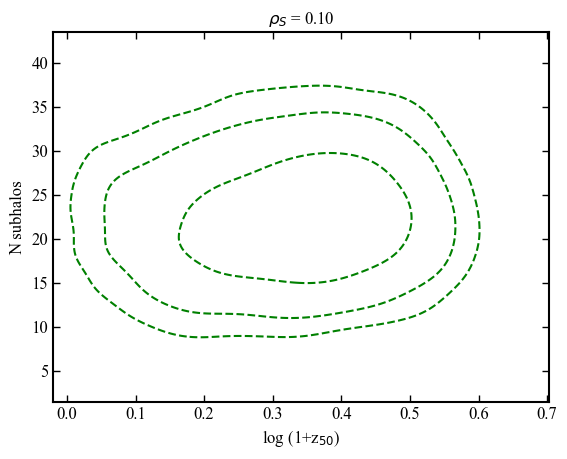

In [27]:
measure_abundance_correlation(S0, 1e9)

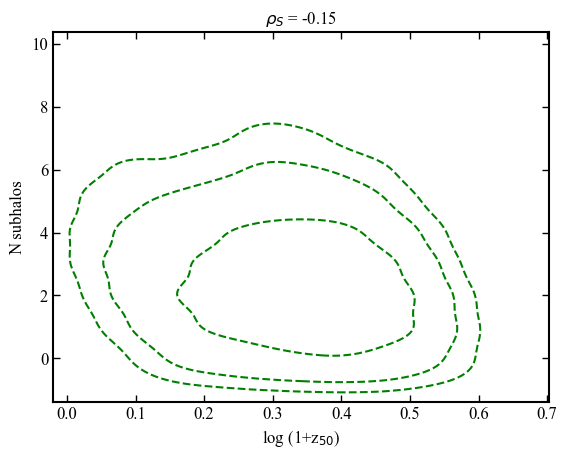

In [28]:
measure_abundance_correlation(S0, 1e10)

In [29]:
# (5e7)/(4.5*10**5) # TNG50 uses ~100 particles to resolve subhalos

# the z50 values are not shuffled and the correlations above are valid

In [30]:
def measure_SHMF(sample, mass_res, mask_orders=None):

    final_mass = jsm_ancillary.make_matrix(sample, "sat_mass")
    acc_order = jsm_ancillary.make_matrix(sample, "sat_acc_order")
    final_order = jsm_ancillary.make_matrix(sample, "sat_order")

    z50s = np.log10(1 + sample.host_z50)
    norm = Normalize(vmin=np.log10(1+z50s.min()), vmax=np.log10(1+z50s.max()))
    cmap = plt.cm.viridis

    if mask_orders=="1":
        order_mask = acc_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="2":
        order_mask = acc_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="3":
        order_mask = final_order == 1
        final_mass = np.where(order_mask, final_mass, np.nan)

    if mask_orders=="4":
        order_mask = final_order == 2
        final_mass = np.where(order_mask, final_mass, np.nan)

    res_cut = final_mass > mass_res
    final_mass = np.where(res_cut, final_mass, np.nan)

    fig, ax = plt.subplots()

    for i, sat_pop in enumerate(final_mass):
        arr = sat_pop[~np.isnan(sat_pop)]
        arr = np.log10(np.sort(arr))
        Ngrt = np.arange(arr.shape[0])[::-1]
        c = cmap(norm(np.log10(1+z50s[i])))

        ax.step(arr, Ngrt, where="mid", color=c, alpha=0.2)

    ax.set_xlabel("log m(z=0)")
    ax.set_ylabel("N > log m(z=0)")

    # --- custom colorbar ---
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])  # required by colorbar
    cbar = fig.colorbar(sm, ax=ax, label="log (1+z$_{50}$)")
    ax.set_yscale("log")
    plt.show()

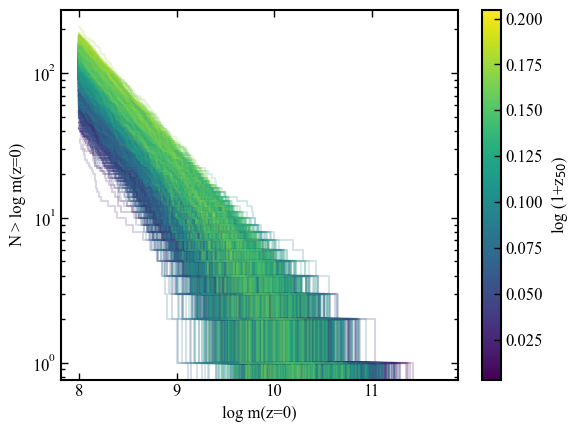

In [31]:
measure_SHMF(S0[0:5100], 1e8, mask_orders="1")

In [32]:
def measure_fbound_zacc(sample, mass_res, mask_orders=None):

    f_bound = np.log10(jsm_ancillary.make_matrix(sample, "sat_mass")/jsm_ancillary.make_matrix(sample, "sat_acc_mass"))
    acc_order = jsm_ancillary.make_matrix(sample, "sat_acc_order")
    final_order = jsm_ancillary.make_matrix(sample, "sat_order")
    zacc = np.log10(1+jsm_ancillary.make_matrix(sample, "sat_zacc"))


    z50s = np.log10(1 + sample.host_z50)
    norm = Normalize(vmin=np.log10(1+z50s.min()), vmax=np.log10(1+z50s.max()))
    cmap = plt.cm.viridis

    if mask_orders=="1":
        order_mask = acc_order == 1
        f_bound = np.where(order_mask, f_bound, np.nan)

    if mask_orders=="2":
        order_mask = acc_order == 2
        f_bound = np.where(order_mask, f_bound, np.nan)

    if mask_orders=="3":
        order_mask = final_order == 1
        f_bound = np.where(order_mask, f_bound, np.nan)

    if mask_orders=="4":
        order_mask = final_order == 2
        f_bound = np.where(order_mask, f_bound, np.nan)

    res_cut = f_bound > mass_res
    f_bound = np.where(res_cut, f_bound, np.nan)
    zacc = np.where(res_cut, zacc, np.nan)

    x = zacc.ravel()[0:10000]
    y = f_bound.ravel()[0:10000]

    sns.kdeplot(x=x, y=y, levels=levelz, bw_adjust=1.2)
    plt.xlabel("log (1+z$_{\\rm acc}$)")
    plt.ylabel("log f$_{\\rm b}$")
    plt.ylim(-4, 0)
    plt.xlim(0, 1.25)
    plt.show()

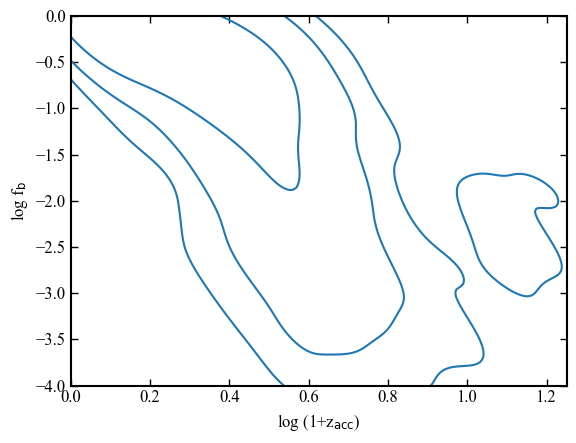

In [33]:
measure_fbound_zacc(S0, mass_res=-4, mask_orders="1")